# PyDataPDX Lunch and Learn: Pandas 102 (Template)
*Thursday, April 22, 2021* 


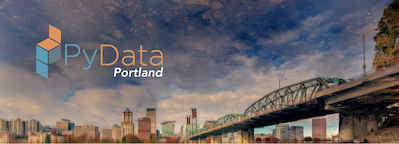

Join our [Slack](https://tinyurl.com/pydatapdx).
  - Make sure to join these channels!
    - #learning-skill-and-dev
    - #jobs
    - #meetup-general

Follow us on [Twitter](https://twitter.com/pydatapdx).   

## Agenda

- Quick recap of Pandas 101 (5 minutes)
- Today's agenda (5 minutes)
- Coding (30 minutes)
- Feedback (5 minutes)

# Recap of Pandas 101

In the first session, we covered the following topics:
- What is conda? (It's a package manager)
- How do I install it? ([Download Anaconda](https://docs.anaconda.com/anaconda/install/))
- How to create environments (`conda create --name pandas102 python=3.7 pandas=1.2.4 numpy=1.19.2 ipykernel`)
- Using JupyterLab
  - `conda install nb_conda_kernels`
  - `jupyter lab`
- Introduction to Data Analysis with PyData Tools Notebook


## Pandas 102 Agenda

In today's lunch, you will learn (or re-learn) how to:

-  Set DataFrame Indexes
-  Identify and handle missing data
-  Update DataFrame values
-  Reshape a DataFrame

In [153]:
import pandas as pd, numpy as np

### Setting and Resetting a DataFrame Index

In [154]:
# Read the csv into a DataFrame 



,ID,Product,Category,Condition,Price,April_Sales
0,1543,Laptop,Electronics,Used,900,3
1,8931,Microphone,Electronics,New,350,2
2,3004,Journal,Stationary,New,20,10
3,8990,Desk,Furniture,Used,250,1
4,6774,Turntable,Electronics,Used,55,1


In [155]:
# View the current index


RangeIndex(start=0, stop=14, step=1)

In [156]:
# View the current columns


Index(['ID', 'Product', 'Category', 'Condition', 'Price', 'April_Sales'], dtype='object')

In [157]:
# Access values using the indexes


'Laptop'

In [158]:
# Set a new index



,Product,Category,Condition,Price,April_Sales
ID,,,,,
1543,Laptop,Electronics,Used,900,3
8931,Microphone,Electronics,New,350,2
3004,Journal,Stationary,New,20,10
8990,Desk,Furniture,Used,250,1
6774,Turntable,Electronics,Used,55,1


In [159]:
# View the new Index


Int64Index([1543, 8931, 3004, 8990, 6774, 5565, 2913, 4253, 7896, 3254, 4554,
            4567, 4565, 4587],
           dtype='int64', name='ID')

In [160]:
# Search by ID


Product             Laptop
Category       Electronics
Condition             Used
Price                  900
April_Sales              3
Name: 1543, dtype: object

In [175]:
# Set a new hierarchical index




,,,Product,Price,April_Sales
ID,Category,Condition,,,
1543,Electronics,Used,Laptop,900,3
8931,Electronics,New,Microphone,350,2
3004,Stationary,New,Journal,20,10
8990,Furniture,Used,Desk,250,1
6774,Electronics,Used,Turntable,55,1


In [176]:
# view the updated index


MultiIndex([(1543, 'Electronics', 'Used'),
            (8931, 'Electronics',  'New'),
            (3004,  'Stationary',  'New'),
            (8990,   'Furniture', 'Used'),
            (6774, 'Electronics', 'Used'),
            (5565, 'Electronics',  'New'),
            (2913,  'Stationary',  'New'),
            (4253,   'Household',  'New'),
            (7896, 'Electronics',  'New'),
            (3254, 'Electronics', 'Used'),
            (4554,     'Kitchen',  'New'),
            (4567,     'Kitchen', 'Used'),
            (4565,     'Bedroom',  'New'),
            (4587,     'Bedroom',  'New')],
           names=['ID', 'Category', 'Condition'])

In [177]:
# Swap the level of Category and ID indexes



Product  Price  April_Sales
Category    ID   Condition                                
Electronics 1543 Used           Laptop    900            3
            8931 New        Microphone    350            2
Stationary  3004 New           Journal     20           10
Furniture   8990 Used             Desk    250            1
Electronics 6774 Used        Turntable     55            1

In [178]:
# access a DataFrame of Electronics products


,,Product,Price,April_Sales
ID,Condition,,,
1543,Used,Laptop,900,3
8931,New,Microphone,350,2
6774,Used,Turntable,55,1
5565,New,Keyboard,25,5
7896,New,USB Cable,6,5
3254,Used,HDMI Cable,12,7


In [179]:
# calculate the number of Electronics sold in April


23

### Identifying and Handling Missing Data

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,BG1,BP,01/01/2000 00:00,NaN,mBar,P
1,BG1,BP,02/01/2000 00:00,NaN,mBar,P
2,BG1,BP,03/01/2000 00:00,NaN,mBar,P
3,BG1,BP,04/01/2000 00:00,NaN,mBar,P
4,BG1,BP,05/01/2000 00:00,NaN,mBar,P


In [252]:
# What are the different species in this data?


array(['BP', 'NO', 'NO2', 'NOX', 'RAIN', 'RHUM'], dtype=object)

In [253]:
# How many missing values are there?


Site                          0
Species                       0
ReadingDateTime               0
Value                      8788
Units                         0
Provisional or Ratified       0
dtype: int64

In [254]:
# What percentage of the dataset is missing?


(8788, 46026, 0.19093555816277755)

In [255]:
# Drop all rows with null values


37238

In [256]:
# Replace null values with 0


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Value, dtype: float64

In [259]:
# Replace null values with surrounding data


0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
46021    29.0
46022    29.0
46023    29.0
46024    29.0
46025    29.0
Name: Value, Length: 46026, dtype: float64

In [242]:
# Replace null value with a calculated field


0        218.747739
1        218.747739
2        218.747739
3        218.747739
4        218.747739
            ...    
46021    218.747739
46022    218.747739
46023    218.747739
46024    218.747739
46025    218.747739
Name: Value, Length: 46026, dtype: float64

In [243]:
# For this lesson, drop all rows with NaN



,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
91,BG1,BP,01/04/2000 00:00,996.0,mBar,P
92,BG1,BP,02/04/2000 00:00,993.0,mBar,P
93,BG1,BP,03/04/2000 00:00,985.0,mBar,P
94,BG1,BP,04/04/2000 00:00,993.0,mBar,P
95,BG1,BP,05/04/2000 00:00,1012.0,mBar,P


In [244]:
# Set Index



,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,BG1,BP,01/04/2000 00:00,996.0,mBar,P
1,BG1,BP,02/04/2000 00:00,993.0,mBar,P
2,BG1,BP,03/04/2000 00:00,985.0,mBar,P
3,BG1,BP,04/04/2000 00:00,993.0,mBar,P
4,BG1,BP,05/04/2000 00:00,1012.0,mBar,P


### Update DataFrame Values

In [245]:
# These two dates should be equal


(Timestamp('2000-01-04 00:00:00'), Timestamp('2000-04-01 00:00:00'))

In [246]:
# If formatted correctly, they are!


Timestamp('2000-04-01 00:00:00')

In [247]:
# Change the date format



,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,BG1,BP,2000-04-01,996.0,mBar,P
1,BG1,BP,2000-04-02,993.0,mBar,P
2,BG1,BP,2000-04-03,985.0,mBar,P
3,BG1,BP,2000-04-04,993.0,mBar,P
4,BG1,BP,2000-04-05,1012.0,mBar,P


### Reshape a DataFrame

In [248]:
# pivot the DataFrame



Species,BP,NO,NO2,NOX,RAIN,RHUM
ReadingDateTime,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,0.0,84.0
2000-01-02,NaN,NaN,NaN,NaN,0.0,80.0
2000-01-03,NaN,NaN,NaN,NaN,0.0,85.0
2000-01-04,NaN,NaN,NaN,NaN,0.0,82.0
2000-01-05,NaN,NaN,NaN,NaN,0.0,78.0


In [262]:
# What are the descriptive statistics?


Species,BP,NO,NO2,NOX,RAIN,RHUM
count,7350.000000,6621.000000,6615.000000,6632.000000,7400.0,2620.000000
mean,1011.058912,10.378327,26.516659,42.598266,0.0,71.683588
std,10.575838,21.753358,14.235892,44.545126,0.0,9.823503
min,968.000000,-2.100000,-0.700000,0.600000,0.0,9.000000
25%,1005.000000,1.800000,15.900000,19.100000,0.0,66.000000
50%,1012.000000,3.600000,23.700000,29.400000,0.0,73.000000
75%,1018.000000,8.700000,34.200000,48.400000,0.0,79.000000
max,1041.000000,332.500000,119.100000,629.000000,0.0,94.000000


# References

- [Data Cleaning Challenges: Handling Missing Values by Rachel Tatman](https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values)

- [Datasets for Data Cleaning Practice by Rachel Tatman](https://makingnoiseandhearingthings.com/2018/04/19/datasets-for-data-cleaning-practice/)
    - London Air
        > Issues: Lots of gaps (null/zero handling), outliers, date handling, pivots and time aggregation needed first!
        
- Python for Data Analysis by Wes McKinney
    - [GitHub Repository with Notebooks and Datasets](https://github.com/wesm/pydata-book)
    - [Buy the book online](https://www.oreilly.com/library/view/python-for-data/9781491957653/)
    
    
- [Using Hierarchical Indexes With Pandas by Todd Birchard](https://hackersandslackers.com/hierarchical-indexes-pandas)